In [27]:
from ultralytics import YOLO
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#Task 1: using KLT
video_path = r"C:\Users\Taimoor\classroom.mp4"
video = cv.VideoCapture(video_path)

width  = video.get(cv.CAP_PROP_FRAME_WIDTH)   # float `width`
height = video.get(cv.CAP_PROP_FRAME_HEIGHT)  # float `height`

#Making a video file to write to
writeto = cv.VideoWriter(r"C:\Users\Taimoor\out_classroom.mp4",  cv.CAP_FFMPEG, cv.VideoWriter.fourcc('X','V','I','D'), video.get(cv.CAP_PROP_FPS), np.uint32((width, height)))

ret,prevFrame = video.read()
ret,nextFrame = video.read() #Getting next frame to calculate optical flow
mask = np.zeros(prevFrame.shape, dtype = np.uint8)

while ret:
    gray = cv.cvtColor(prevFrame,cv.COLOR_BGR2GRAY)
    new_gray = cv.cvtColor(nextFrame,cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray,100,0.01,20) #Getting Shi-Tomasi corners

    nextPts,status, err = cv.calcOpticalFlowPyrLK(gray, new_gray, corners, None)
    prevFrame = nextFrame.copy() #Before we edit the next frame

    for i in range(len(nextPts)):
        #cv.putText(nextFrame, f"ID:{i}", np.uint32(nextPts[i,0]), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 6)
        if (np.linalg.norm(nextPts[i,0] - corners[i,0]) > 3): #only draw teh points if they move
            cv.line(mask, np.int32(nextPts[i,0]), np.int32(corners[i,0]), (255, 0, 255), 3)

    writeto.write(cv.add(nextFrame, mask))

    ret,nextFrame = video.read() #Getting next frame to calculate optical flow

writeto.release()

In [28]:
#Task 2 Using Horn Schunck Method
video_path = r"C:\Users\Taimoor\classroom.mp4"
video = cv.VideoCapture(video_path)

width  = video.get(cv.CAP_PROP_FRAME_WIDTH)   # float `width`
height = video.get(cv.CAP_PROP_FRAME_HEIGHT)  # float `height`

#Making a video file to write to
writeto = cv.VideoWriter(r"C:\Users\Taimoor\out_classroom_2.mp4",  cv.CAP_FFMPEG, cv.VideoWriter.fourcc('X','V','I','D'), video.get(cv.CAP_PROP_FPS), np.uint32((width, height)))

ret,prevFrame = video.read()
ret,nextFrame = video.read() #Getting next frame to calculate optical flow
mask = np.zeros(prevFrame.shape, dtype = np.uint8)

noPoints = 100

u = np.zeros((noPoints))
v = np.zeros((noPoints))

while ret:
    gray = cv.cvtColor(prevFrame,cv.COLOR_BGR2GRAY)
    new_gray = cv.cvtColor(nextFrame,cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray,noPoints,0.01,20) #Getting Shi-Tomasi corners

    Fx = np.zeros((noPoints))
    Fy = np.zeros((noPoints))
    Ft = np.zeros((noPoints))
    i = 0
    for item in np.int32(corners):
        Fx[i] = gray[item[0,1],item[0,0]] - gray[item[0,1] - 1,item[0,0]]
        Fy[i] = gray[item[0,1],item[0,0]] - gray[item[0,1],item[0,0] - 1]
        Ft[i] = new_gray[item[0,1],item[0,0]] - gray[item[0,1],item[0,0]]

        u[i] = u[i] - Fx[i]*(Fx[i]*u[i] + Fy[i]*v[i] + Ft[i])/(Fx[i]**2 + Fy[i]**2 + 4)
        v[i] = v[i] - Fy[i]*(Fx[i]*u[i] + Fy[i]*v[i] + Ft[i])/(Fx[i]**2 + Fy[i]**2 + 4)

        i = i + 1     

    prevFrame = nextFrame.copy() #Before we edit the next frame

    for i in range(len(corners)):
        #cv.putText(nextFrame, f"ID:{i}", np.uint32(nextPts[i,0]), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 6)
        if (np.linalg.norm((u[i],v[i])) > 3): #only draw teh points if they move
            cv.line(mask, np.int32(corners[i,0] + (v[i], u[i])), np.int32(corners[i,0]), (255, 0, 255), 3)

    writeto.write(cv.add(nextFrame, mask))

    ret,nextFrame = video.read() #Getting next frame to calculate optical flow

writeto.release()

C:\Users\Taimoor\AppData\Local\Temp\ipykernel_1152\1668003036.py:32: RuntimeWarning: overflow encountered in scalar subtract
  Ft[i] = new_gray[item[0,1],item[0,0]] - gray[item[0,1],item[0,0]]
C:\Users\Taimoor\AppData\Local\Temp\ipykernel_1152\1668003036.py:30: RuntimeWarning: overflow encountered in scalar subtract
  Fx[i] = gray[item[0,1],item[0,0]] - gray[item[0,1] - 1,item[0,0]]
C:\Users\Taimoor\AppData\Local\Temp\ipykernel_1152\1668003036.py:31: RuntimeWarning: overflow encountered in scalar subtract
  Fy[i] = gray[item[0,1],item[0,0]] - gray[item[0,1],item[0,0] - 1]



0: 224x224 lion 1.00, dhole 0.00, collie 0.00, Pomeranian 0.00, Shetland_sheepdog 0.00, 9.9ms
Speed: 102.0ms preprocess, 9.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


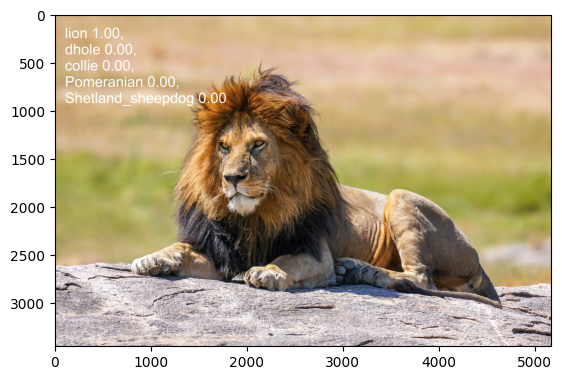

In [32]:
#Task 3 - Yolo classification of images
model = YOLO('yolov8n-cls.pt')
img = cv.imread('lion.jpg')

prediction = model(img)

plt.imshow(prediction[0].plot()[:,:,::-1])
plt.show()

In [29]:
print(prediction)

[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'African_c